Understanding Data: Types, Collection, Cleaning, and Visualization

Learning Outcomes
- Understand the different types of data
- Learn about data collection methods and ethics
- Perform basic data cleaning tasks
- Create visualizations to explore data

In [3]:
# Setup Cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download dataset
!wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv -O titanic.csv

--2025-10-20 11:52:40--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57018 (56K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  55.68K  --.-KB/s    in 0.01s   

2025-10-20 11:52:40 (5.12 MB/s) - ‘titanic.csv’ saved [57018/57018]



In [4]:
# Warm-Up Task
data = pd.read_csv('titanic.csv')
assert data.shape == (891, 15), "Data loading failed. Please check the dataset."

In [5]:
# Guided Task 1: Understanding Data Types
data_types = data.dtypes
data_types

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


In [6]:
# Guided Task 2: Handling Missing Values
data_cleaned = data.dropna(subset=['age'])
assert data_cleaned.shape[0] < data.shape[0], "Missing values not handled correctly."

In [7]:
# Guided Task 3: Removing Duplicates
data_no_duplicates = data_cleaned.drop_duplicates()
assert data_no_duplicates.shape[0] <= data_cleaned.shape[0], "Duplicates not removed correctly."

In [8]:
# Guided Task 4: Correcting Errors
data_no_duplicates['age'] = data_no_duplicates['age'].replace({0: np.nan})
data_no_duplicates = data_no_duplicates.dropna(subset=['age'])
assert data_no_duplicates['age'].isin([0]).sum() == 0, "Errors not corrected correctly."

/tmp/ipython-input-4011749902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_duplicates['age'] = data_no_duplicates['age'].replace({0: np.nan})


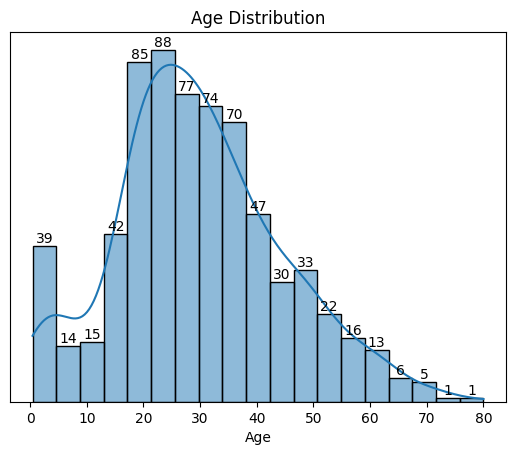

In [11]:
# Guided Task 5: Basic Data Visualization
ax = sns.histplot(data_no_duplicates['age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Remove y-axis values
ax.yaxis.set_visible(False)

plt.show()

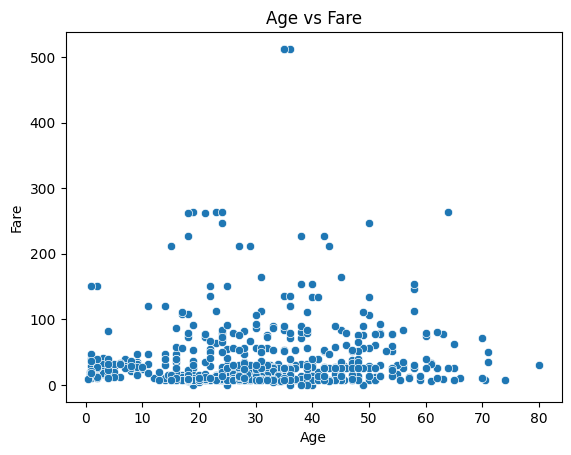

In [10]:
# Guided Task 6: Scatter Plot
sns.scatterplot(data=data_no_duplicates, x='age', y='fare')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [12]:
# Challenge Task 1: Advanced Data Cleaning
data_no_duplicates['embarked'] = data_no_duplicates['embarked'].fillna(data_no_duplicates['embarked'].mode()[0])
assert data_no_duplicates['embarked'].isna().sum() == 0, "Missing values in 'embarked' not handled correctly."

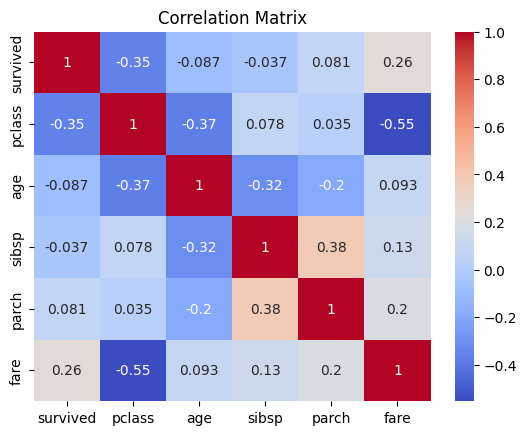

In [14]:
# Challenge Task 2: Create a Correlation Matrix
numeric_data = data_no_duplicates.select_dtypes(include=np.number)
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

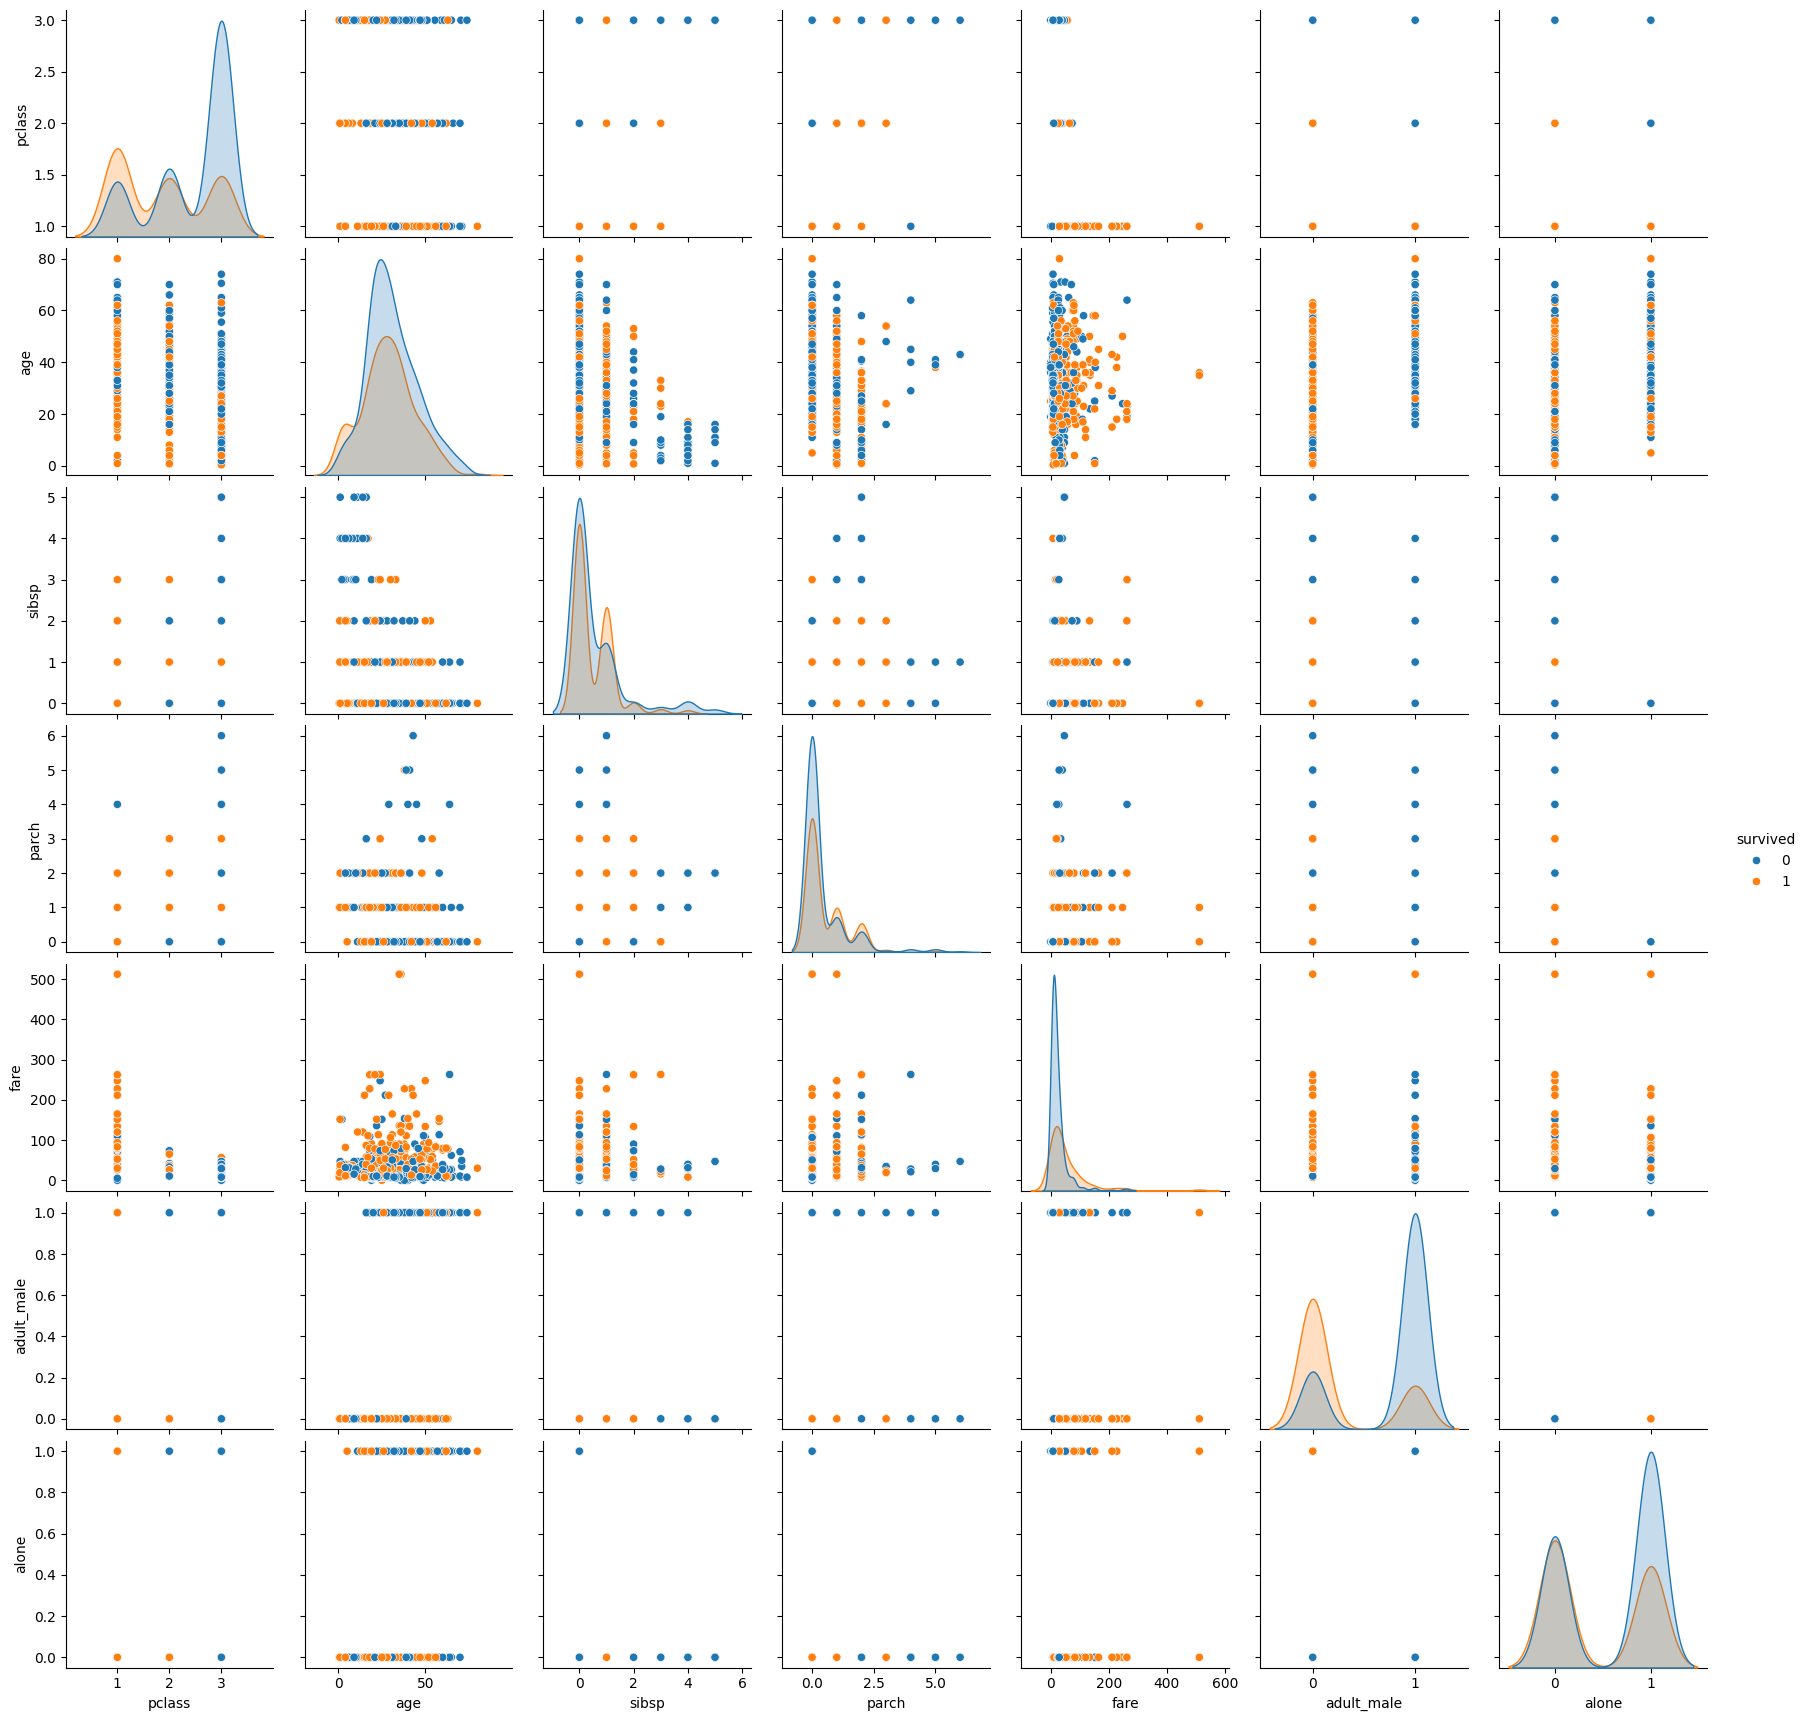

In [15]:
# Challenge Task 3: Advanced Visualization
sns.pairplot(data_no_duplicates, hue='survived')
plt.show()